In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Sales dataset.csv")
df.head()

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,74.093658,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,Control,High Value,229.685623,270.167701,83.974852,87.738591,Yes


In [3]:
df.shape

(10000, 7)

In [4]:
df.describe(include='all')

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
count,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000
unique,2,3,NaN,NaN,NaN,NaN,2
top,Control,Medium Value,NaN,NaN,NaN,NaN,Yes
freq,5013,3355,NaN,NaN,NaN,NaN,5076
mean,NaN,NaN,203.846220,280.378330,70.249026,73.921449,NaN
std,NaN,NaN,55.431215,85.463933,16.927639,18.185050,NaN
min,NaN,NaN,24.852966,32.414352,22.202441,18.224938,NaN
25%,NaN,NaN,166.610755,221.438134,56.348229,59.866027,NaN
50%,NaN,NaN,203.347924,273.599150,69.644307,73.708858,NaN
75%,NaN,NaN,239.220116,332.376500,83.318174,90.403099,NaN


In [5]:
df.notnull().count()

Group                           10000
Customer_Segment                10000
Sales_Before                    10000
Sales_After                     10000
Customer_Satisfaction_Before    10000
Customer_Satisfaction_After     10000
Purchase_Made                   10000
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Group                         10000 non-null  object 
 1   Customer_Segment              10000 non-null  object 
 2   Sales_Before                  10000 non-null  float64
 3   Sales_After                   10000 non-null  float64
 4   Customer_Satisfaction_Before  10000 non-null  float64
 5   Customer_Satisfaction_After   10000 non-null  float64
 6   Purchase_Made                 10000 non-null  object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB


<AxesSubplot:ylabel='Customer_Satisfaction_After'>

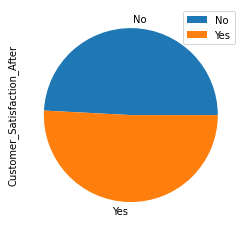

In [7]:
df.groupby(['Purchase_Made']).sum().plot(kind='pie',y='Customer_Satisfaction_After')

<AxesSubplot:xlabel='Purchase_Made'>

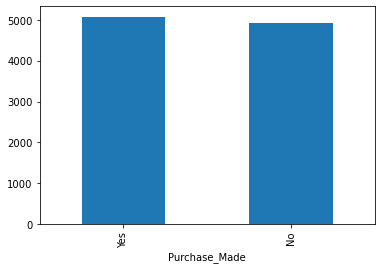

In [8]:
df.Purchase_Made.value_counts().plot(kind='bar')

(array([1.240e+02, 1.236e+03, 3.351e+03, 3.237e+03, 1.496e+03, 4.510e+02,
        9.100e+01, 1.000e+01, 3.000e+00, 1.000e+00]),
 array([ 32.41435228, 110.9949168 , 189.57548132, 268.15604584,
        346.73661036, 425.31717487, 503.89773939, 582.47830391,
        661.05886843, 739.63943295, 818.21999746]),
 <BarContainer object of 10 artists>)

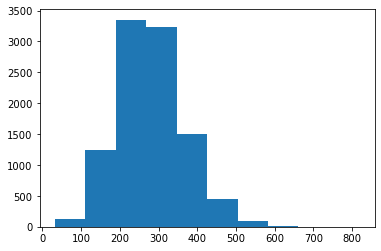

In [9]:
plt.hist(df['Sales_After'])

In [10]:
df['Group'].unique()

array(['Control', 'Treatment'], dtype=object)

In [11]:
df1=pd.get_dummies(df[['Group','Customer_Segment','Purchase_Made']],dtype=int)

In [12]:
df=pd.concat([df,df1],axis=1).reindex(df.index)
df.drop(['Group_Treatment','Customer_Segment_High Value','Purchase_Made_No','Group','Customer_Segment','Purchase_Made'],axis=1,inplace=True)

In [13]:
df.head()

,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Group_Control,Customer_Segment_Low Value,Customer_Segment_Medium Value,Purchase_Made_Yes
0,240.548359,300.007568,74.684767,74.093658,1,0,0,0
1,246.862114,381.337555,100.000000,100.000000,0,0,0,1
2,156.978084,179.330464,98.780735,100.000000,1,0,0,0
3,192.126708,229.278031,49.333766,39.811841,1,0,1,1
4,229.685623,270.167701,83.974852,87.738591,1,0,0,1


In [14]:
df['Sales_Before'] = df['Sales_Before'].round(2)

In [15]:
df['Sales_After'] = df['Sales_After'].round(2)
df['Customer_Satisfaction_Before'] = df['Customer_Satisfaction_Before'].round(2)
df['Customer_Satisfaction_After'] = df['Customer_Satisfaction_After'].round(2)
df.head()

,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Group_Control,Customer_Segment_Low Value,Customer_Segment_Medium Value,Purchase_Made_Yes
0,240.55,300.01,74.68,74.09,1,0,0,0
1,246.86,381.34,100.00,100.00,0,0,0,1
2,156.98,179.33,98.78,100.00,1,0,0,0
3,192.13,229.28,49.33,39.81,1,0,1,1
4,229.69,270.17,83.97,87.74,1,0,0,1


In [16]:
x=df.drop(columns={'Purchase_Made_Yes'})
y=df['Purchase_Made_Yes']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [18]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(random_state=0)
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [19]:
y_pred=model.predict(x_test)
y_pred

array([0., 0., 0., ..., 1., 0., 0.])

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred1=y_pred.astype(int)
print("confusion matrix->\n",confusion_matrix(y_test,y_pred1))
print("accuracy score->",accuracy_score(y_test,y_pred1))

confusion matrix->
 [[506 493]
 [499 502]]
accuracy score-> 0.504


In [21]:
import pickle 
pickle_out=open("classifier.pkl","wb")
pickle.dump(model,pickle_out)
pickle_out.close()